All Models

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Loading the data

In [5]:
# Load the data
df = pd.read_csv('IoT Network Intrusion Dataset.csv')
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [6]:
df['Label']=df['Label'].replace({'Anomaly':1,'Normal':0})

In [7]:
df['Sub_Cat'].unique()

array(['Mirai-Ackflooding', 'DoS-Synflooding', 'Scan Port OS',
       'Mirai-Hostbruteforceg', 'Mirai-UDP Flooding',
       'Mirai-HTTP Flooding', 'Normal', 'Scan Hostport',
       'MITM ARP Spoofing'], dtype=object)

In [8]:
normal=df[df['Label']==0]
print("normal shape -->",normal.shape)
mirai_ackflooding =df[(df['Sub_Cat']=='Mirai-Ackflooding')|(df['Label']==0)]
print("mirai_ackflooding shape -->",mirai_ackflooding.shape)

Dos_synflooding=df[(df['Sub_Cat']=='DoS-Synflooding')|(df['Label']==0)]
print("Dos_synflooding shape -->",Dos_synflooding.shape)

mirai_hostbruteforce =df[(df['Sub_Cat']=='Mirai-Hostbruteforceg')|(df['Label']==0)]
print("mirai_hostbruteforce shape -->",mirai_hostbruteforce.shape)

mirai_httpflooding =df[(df['Sub_Cat']=='Mirai-HTTP Flooding')|(df['Label']==0)]
print(  "mirai_httpflooding shape -->",mirai_httpflooding.shape)

mirai_udpflooding =df[(df['Sub_Cat']=='Mirai-UDP Flooding')|(df['Label']==0)]
print("mirai_udpflooding shape -->",mirai_udpflooding.shape)

mitm_arp_spoofing =df[(df['Sub_Cat']=='MITM ARP Spoofing')|(df['Label']==0)]
print("mitm_arp_spoofing shape -->",mitm_arp_spoofing.shape)

scan_port_os=df[(df['Sub_Cat']=='Scan Port OS')|(df['Label']==0)]
print("scan_port_os shape -->",scan_port_os.shape)

scan_hostport_os=df[(df['Sub_Cat']=='Scan Hostport')|(df['Label']==0)]
print("scan_hostport_os shape -->",scan_hostport_os.shape)

normal shape --> (40073, 86)
mirai_ackflooding shape --> (95197, 86)
Dos_synflooding shape --> (99464, 86)
mirai_hostbruteforce shape --> (161254, 86)
mirai_httpflooding shape --> (95891, 86)
mirai_udpflooding shape --> (223627, 86)
mitm_arp_spoofing shape --> (75450, 86)
scan_port_os shape --> (93146, 86)
scan_hostport_os shape --> (62265, 86)


In [9]:
#we can try Logistic regression with Nueral network
# we can try CNN and ANN to illustrate the logistic Regression
mirai_ackflooding.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

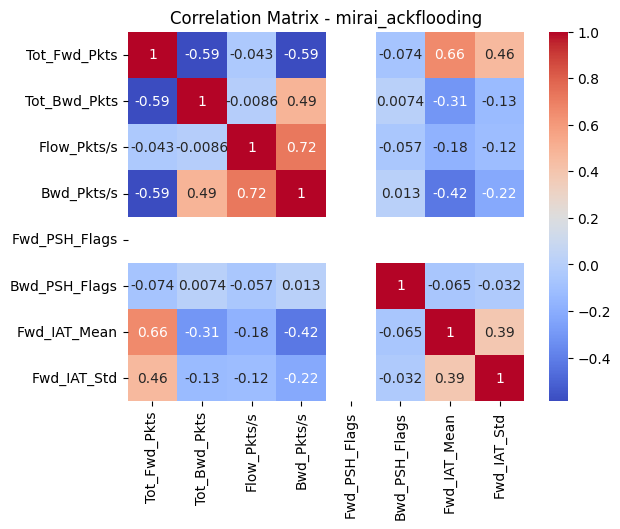

In [10]:
subset = mirai_ackflooding[['Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
        'Flow_Pkts/s','Bwd_Pkts/s','Fwd_PSH_Flags', 'Bwd_PSH_Flags','Fwd_IAT_Mean',
        'Fwd_IAT_Std']] 
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - mirai_ackflooding')
plt.show()


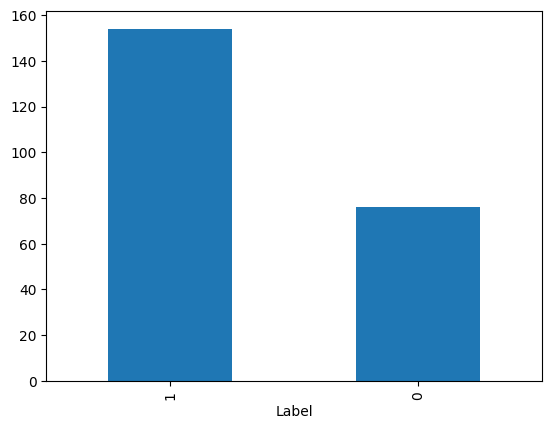

In [11]:
final_1=mirai_ackflooding[['Src_IP', 'Dst_IP','Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
        'Flow_Pkts/s','Bwd_Pkts/s','Fwd_PSH_Flags', 'Bwd_PSH_Flags','Fwd_IAT_Mean',
        'Fwd_IAT_Std','Label']] 

# final_1['Label'].unique()
# Grouping by 'src_ip' and 'dst_ip' and calculating the average for other columns

result_df = final_1.groupby(['Src_IP', 'Dst_IP','Label']).mean().reset_index()

final_1=result_df[['Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
        'Flow_Pkts/s','Bwd_Pkts/s','Fwd_PSH_Flags', 'Bwd_PSH_Flags','Fwd_IAT_Mean',
        'Fwd_IAT_Std','Label']] 
final_1['Label'].unique()
# plot the count of 1 and 0 in the label

x=final_1['Label'].value_counts()
x.plot(kind='bar')
X=final_1.drop('Label',axis=1)
y=final_1['Label']

ROC-AUC score: 0.8727272727272728
accuracy_score: 0.8695652173913043


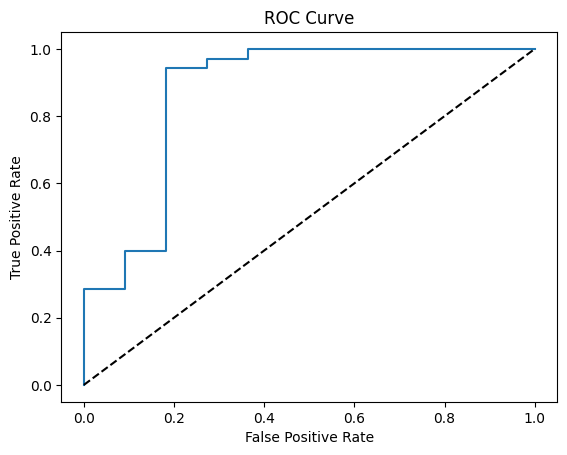

[[ 9  2]
 [ 4 31]]


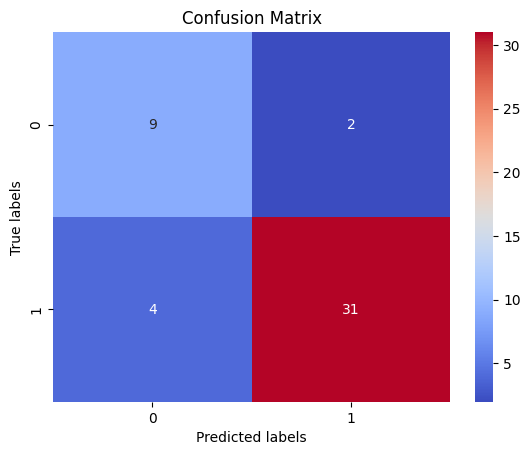

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = xgb_classifier.predict(X_test)

# Calculate the probabilities for the positive class
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the ROC-AUC score
print('ROC-AUC score:', roc_auc)
print('accuracy_score:',accuracy_score(y_test, y_pred))
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



### Logistic Regression


In [22]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_standardized = scaler.fit_transform(final_1.drop('Label', axis=1))
# # final_1['Label']=final_1['Label'].replace({'1.0':1,'0.0':0})
# final_1['Label'].unique()


array([1, 0], dtype=int64)

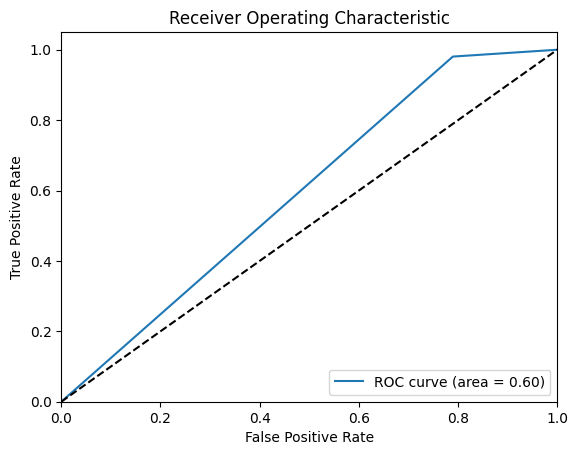

Accuracy: 0.7260869565217392
ROC AUC: 0.5955228981544771
[[ 16  60]
 [  3 151]]


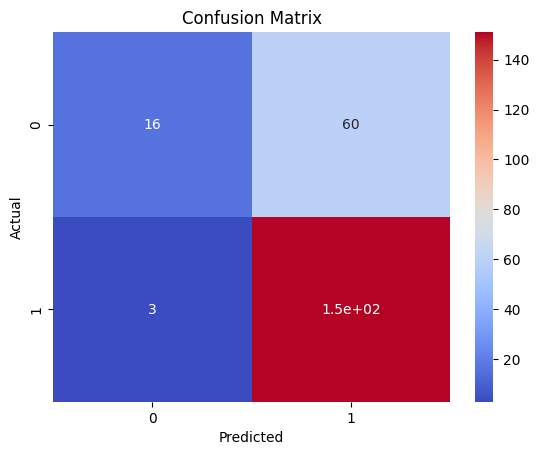

In [15]:
# Step 1: Split the data into features (X) and target variable (y)
X = final_1.drop('Label', axis=1)
y = final_1['Label']

# Step 2: Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Step 3: Create an instance of LogisticRegression
logreg = LogisticRegression()

# Step 4: Perform k-fold cross-validation
k = 10 # number of folds
scores = cross_val_score(logreg, X, y, cv=k)

# Step 5: Fit the logistic regression model on the entire dataset
logreg.fit(X, y)

# Step 6: Use the fitted model to predict the target variable
y_pred = logreg.predict(X)

# Step 7: Calculate accuracy and ROC AUC score
accuracy = logreg.score(X, y)
roc_auc = roc_auc_score(y, y_pred)

# Step 8: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc_curve = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print accuracy and ROC AUC score
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Naive Bayes

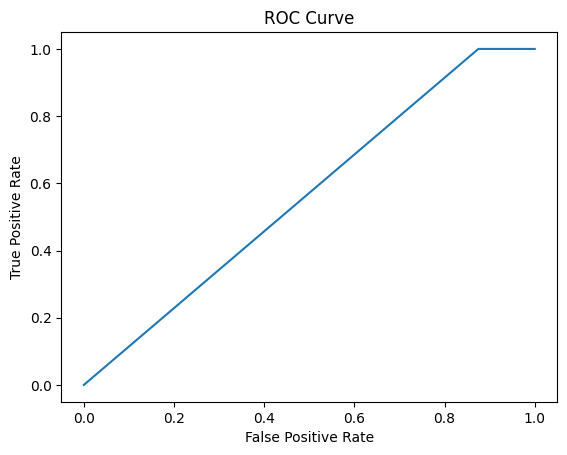

Accuracy scores: [0.6956521739130435, 0.6956521739130435, 0.6521739130434783, 0.8695652173913043, 0.6956521739130435, 0.6521739130434783, 0.6521739130434783, 0.8695652173913043, 0.6086956521739131, 0.6956521739130435]
ROC AUC scores: [0.6309523809523809, 0.5916666666666667, 0.6363636363636364, 0.47619047619047616, 0.5916666666666667, 0.5491071428571428, 0.5491071428571428, 0.7722222222222221, 0.5909090909090908, 0.5625]


In [16]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Perform K-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True)

# Initialize Naive Bayes classifier
nb = GaussianNB()

# Lists to store accuracy and ROC AUC scores
accuracy_scores = []
roc_auc_scores = []

# Iterate over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the classifier
    nb.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = nb.predict(X_test)
    
    # Calculate accuracy and ROC AUC score
    accuracy = nb.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Append scores to the lists
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print accuracy and ROC AUC scores
print("Accuracy scores:", accuracy_scores)
print("ROC AUC scores:", roc_auc_scores)



### Decision Tree


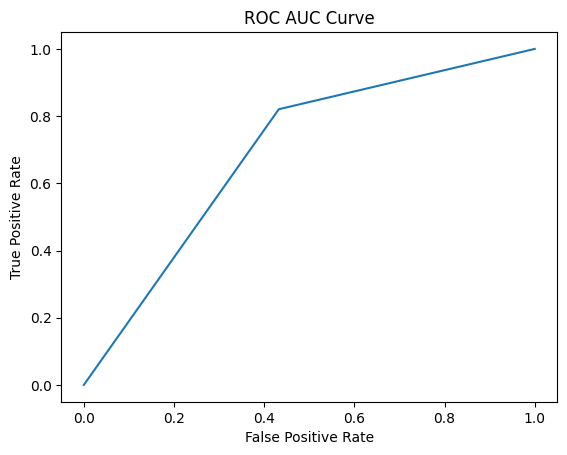

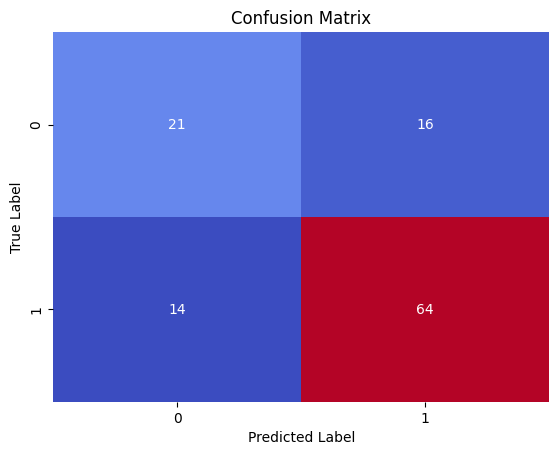

Accuracy: 0.717391304347826
ROC AUC: 0.707583655685482


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform k-fold cross-validation
k = 2
kf = KFold(n_splits=k, shuffle=True)
accuracy_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
roc_auc_scores = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')

# Plot ROC AUC curve and confusion matrix within the loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model within each fold
    clf.fit(X_train, y_train)

    # Perform evaluation and plotting within each fold
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    

    # plt.imshow(confusion_mat)
    # plt.title('Confusion Matrix')
    # plt.colorbar()
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')
    # plt.show()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.show()    
# Print average scores
confusion_mat = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', cbar=False, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_scores.mean()
roc_auc = roc_auc_scores.mean()
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

### KNN Classifier

Accuracy: 0.7565217391304349
ROC AUC: 0.7760254329004328


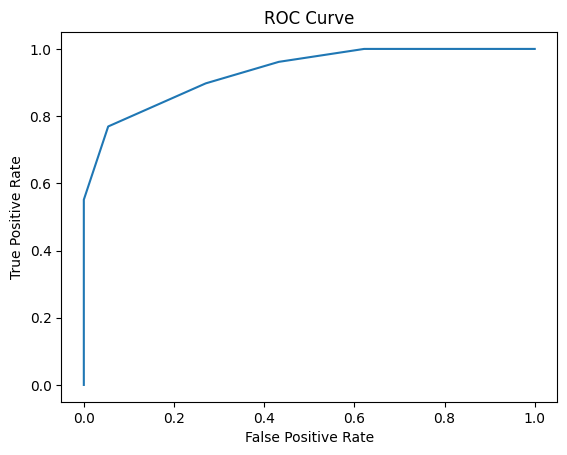

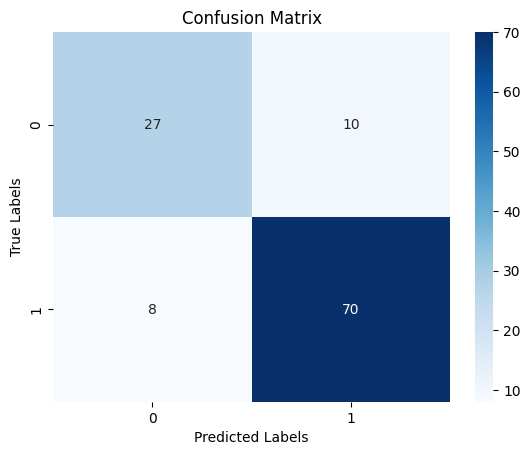

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

# Define the number of folds for cross-validation
k = 10

# Create a k-fold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Perform k-fold cross-validation
accuracy_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
roc_auc_scores = cross_val_score(knn, X, y, cv=kf, scoring='roc_auc')

# Print the accuracy and ROC AUC scores
accuracy = np.mean(accuracy_scores)
roc_auc = np.mean(roc_auc_scores)
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Fit the kNN classifier on the entire dataset
knn.fit(X, y)

# Predict the probabilities for each class
y_probs = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Generate the final confusion matrix
y_pred = knn.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Multilayer Perceptron



Time taken: 0.13900184631347656
Average Accuracy: 0.5956521739130435
Average ROC-AUC: 0.48901377217553677


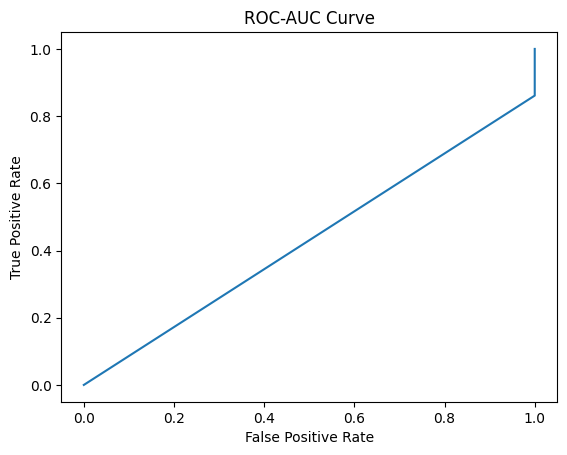

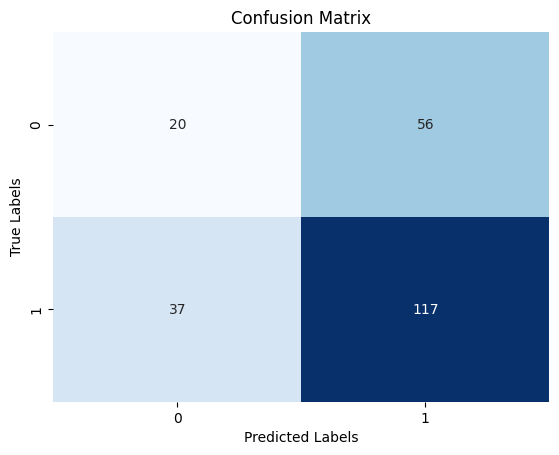

In [20]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import time
start_time = time.time()
# Split the data into input features (X) and target variable (y)
X = final_1.drop('Label', axis=1)
y = final_1['Label']

# Initialize the k-fold cross-validation object
k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=True)

# Initialize lists to store accuracy and ROC-AUC scores
accuracy_scores = []
roc_auc_scores = []

# Initialize an empty confusion matrix
combined_confusion_mat = np.zeros((2, 2))

# Iterate over the k-fold splits
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the artificial neural network model
    model = MLPClassifier()
    model.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy and ROC-AUC score
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Update the accuracy and ROC-AUC score lists
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    
    # Update the combined confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    combined_confusion_mat += confusion_mat

# Calculate the time taken
end_time = time.time()
time_taken = end_time - start_time
print("Time taken:", time_taken)
# Calculate the average accuracy and ROC-AUC score
avg_accuracy = np.mean(accuracy_scores)
avg_roc_auc = np.mean(roc_auc_scores)

print("Average Accuracy:", avg_accuracy)
print("Average ROC-AUC:", avg_roc_auc)

# Plot the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

# Plot the confusion matrix
import seaborn as sns

sns.heatmap(combined_confusion_mat, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




### SVM

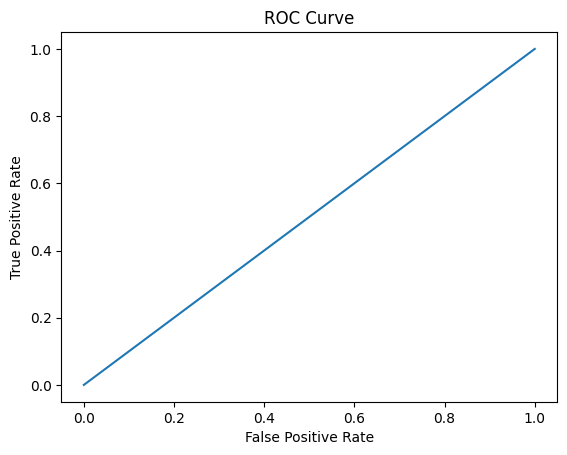

Average Accuracy: 0.6695652173913043
Average ROC AUC: 0.5


In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Perform K-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Initialize the Support Vector Machine classifier
svm = SVC()

# Lists to store the accuracy and ROC AUC scores
accuracy_scores = []
roc_auc_scores = []

# Iterate over each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the SVM classifier
    svm.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy and ROC AUC score
    accuracy = svm.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Append the scores to the lists
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)

# Calculate the average accuracy and ROC AUC score
avg_accuracy = sum(accuracy_scores) / k
avg_roc_auc = sum(roc_auc_scores) / k

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the accuracy and ROC AUC score
print("Average Accuracy:", avg_accuracy)
print("Average ROC AUC:", avg_roc_auc)
